# Quelques exemples préliminaires

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import  pickle
import  numpy as np
import pydot
# data : tableau (films ,features), id2titles : dictionnaire  id -> titre ,
# fields : id  feature  -> nom
[data , id2titles , fields ]= pickle.load(open("imdb_extrait.pkl","rb"))
# la  derniere  colonne  est le vote
datax=data [: ,:32]
datay=np.array ([1 if x[33] >6.5  else  -1 for x in data])



from  decisiontree  import  DecisionTree
dt = DecisionTree ()
dt.max_depth = 5
#on fixe la  taille  de l’arbre a 5
dt.min_samples_split = 2
#nombre  minimum d’exemples  pour  spliter  un noeud
dt.fit(datax ,datay)
dt.predict(datax [:5 ,:])
print(dt.score(datax ,datay))
# dessine l’arbre  dans un  fichier  pdf   si pydot  est  installe.
dt.to_pdf("test_tree.pdf",fields)
# sinon  utiliser  http :// www.webgraphviz.com/
dt.to_dot(fields)
#ou dans la  console
print(dt.print_tree(fields ))

0.736429038587312
var Drama :  > 0.500000 
	var budget :  > 15660000.000000 
		var Duree :  > 115.500000 
			var budget :  > 36500000.000000 
				var Duree :  > 137.500000 
					class : 1 {1: 101, -1: 20}
				var Duree :  <= 137.500000 
					class : 1 {-1: 94, 1: 109}
			var budget :  <= 36500000.000000 
				var Sci-Fi :  > 0.500000 
					class : -1 {-1: 5, 1: 4}
				var Sci-Fi :  <= 0.500000 
					class : 1 {1: 252, -1: 31}
		var Duree :  <= 115.500000 
			var Biography :  > 0.500000 
				var annee :  > 2011.500000 
					class : -1 {-1: 2}
				var annee :  <= 2011.500000 
					class : 1 {1: 24, -1: 2}
			var Biography :  <= 0.500000 
				var Thriller :  > 0.500000 
					class : -1 {-1: 162, 1: 66}
				var Thriller :  <= 0.500000 
					class : -1 {1: 135, -1: 149}
	var budget :  <= 15660000.000000 
		var annee :  > 1973.500000 
			var Duree :  > 104.500000 
				var budget :  > 11158052.500000 
					class : 1 {1: 131, -1: 39}
				var budget :  <= 11158052.500000 
					class : 1 {-1: 25,

On a une profondeur de 5 et un score de 0.736 de bonne classification pour cet arbre.

In [4]:
#dt.max_depth = 15 Comme profondeur on a Out[6]: 0.8820579899716591 de précision

In [5]:
#dt.max_depth = 20 Comme profondeur on a Out[8]: 0.8984085458905603 de précision

Plus notre profondeur augmente plus on a de précisions. Mais on doit faire attention au sur-apprentissage. 

# Sur et sous apprentissage

On défini une fonction pour partitionné nos data en ensemble data d'entrainements et data de test.

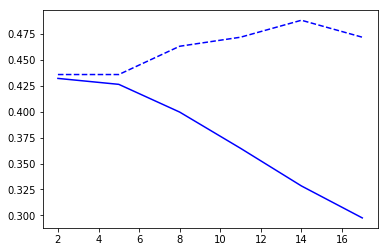

In [6]:
def partitionnement_test(datax,datay,rp,rdm,couleur): #rp la proportion qui sera dans le test. #rdm un booléen qui détermine si on partitionne nos ensemble au hasard.
    
    dt = DecisionTree()
    dt.min_samples_split = 2
    if rdm:
        rp = random.uniform(0,1)
    #inceap nos indices dans datax qui vont servir pour notre apprentissage, et indicet pour nos test. 
    #On tire indiceap aléatoirement avec la proportion rp dans datax, et on effectue des tirages sans remise.
    indiceap = np.random.choice(np.arange(len(datax)), int(rp*len(datax)), replace = False)
    indicet = []
    for i in range(0,len(datax)):
        if i not in indiceap:
            indicet.append(i)
    testy = np.zeros((len(indicet)), int)
    apprentissagey = np.zeros((len(indiceap)),int)
    
       
    
    
    testx = np.delete(datax,indiceap,axis=0)
    
    apprentissagex = np.delete(datax,indicet,axis=0)
    
    for i in range(0,len(indiceap)):
        apprentissagey[i] = datay[indiceap[i]]
    for i in range(0,len(indicet)):
        testy[i] = datay[indicet[i]]
    
    
    l_scoretest = []
    l_scoreapprentissage = []
    #On test différentes profondeurs d'arbres avec comme pas de 3 pour éviter un trop long temps de calcul.
    for i in range(2,20,3):
        dt.max_depth = i
        dt.fit(apprentissagex ,apprentissagey)
        dt.predict(apprentissagex[:5 ,:])
        l_scoretest.append(1 - dt.score(testx,testy))
        l_scoreapprentissage.append(1 - dt.score(apprentissagex,apprentissagey))
    plt.plot(range(2,20,3),l_scoretest,couleur+'--',range(2,20,3),l_scoreapprentissage,couleur)
    plt.show()


partitionnement_test(datax,datay,0.8,False,'b')    


BLEU : 0.8 en APPRENTISSAGE,  0.2 en TEST 
ROUGE : 0.5 en APPRENTISSAGE et en TEST 
VERT : 0.2 en APPRENTISSAGE , 0.8 en TEST

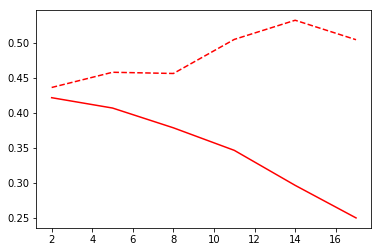

In [7]:
partitionnement_test(datax,datay,0.5,False,'r')

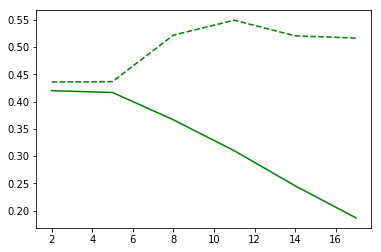

In [8]:
partitionnement_test(datax,datay,0.2,False,'g')

In [9]:
#L'erreur en apprentissage est en trai continue tandis que l'erreur en test est en pointillé.

## Intérpretation

On remarque que pour un ensemble d'apprentissage assez réduit l'erreur pour le test est plus grande que pour les autres partitionnement plus élevé. Idem pour l'erreur en apprentissage, on peut dire que c'est un assez mauvais partitionnement contrairement aux deux autres. On remarque une hausse de l'erreur sur le test en fonction de la profondeur de l'arbre ce qui est assez contre intuitif. Mais globalement les courbes varient de la même façon. 

# Validation croisée: selection de modèle